In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\jupyter notebook\tips (data for regression problem).csv")  
print(data.head())
print(data.info())
print(data.describe())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      

In [4]:

X = data.drop('tip', axis=1)  
y = data['tip']

# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    metrics = {
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test),
        "Train MSE": mean_squared_error(y_train, y_pred_train),
        "Test MSE": mean_squared_error(y_test, y_pred_test),
        "Train R^2": r2_score(y_train, y_pred_train),
        "Test R^2": r2_score(y_test, y_pred_test)
    }
    return metrics

In [6]:
# Linear Regression
lin_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', LinearRegression())])

lin_reg_pipeline.fit(X_train, y_train)
lin_reg_metrics = evaluate_model(lin_reg_pipeline, X_train, X_test, y_train, y_test)
print("Linear Regression Metrics:", lin_reg_metrics)

Linear Regression Metrics: {'Train MAE': 0.7599651398627899, 'Test MAE': 0.6671331480264893, 'Train MSE': 1.100679381232525, 'Test MSE': 0.7033566017436103, 'Train R^2': 0.45824907818983895, 'Test R^2': 0.43730181943482516}


In [7]:
# Ridge Regression
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', Ridge(alpha=1.0))])

ridge_pipeline.fit(X_train, y_train)
ridge_metrics = evaluate_model(ridge_pipeline, X_train, X_test, y_train, y_test)
print("Ridge Regression Metrics:", ridge_metrics)

# Lasso Regression
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', Lasso(alpha=0.1))])

lasso_pipeline.fit(X_train, y_train)
lasso_metrics = evaluate_model(lasso_pipeline, X_train, X_test, y_train, y_test)
print("Lasso Regression Metrics:", lasso_metrics)

Ridge Regression Metrics: {'Train MAE': 0.7599997758807294, 'Test MAE': 0.6669903392952122, 'Train MSE': 1.1007173590549408, 'Test MSE': 0.7016322514094748, 'Train R^2': 0.4582303856253621, 'Test R^2': 0.43868133132576304}
Lasso Regression Metrics: {'Train MAE': 0.7777389383177397, 'Test MAE': 0.6548094795721159, 'Train MSE': 1.126874566574518, 'Test MSE': 0.6122095126615545, 'Train R^2': 0.44535589053866165, 'Test R^2': 0.5102211622875712}


In [8]:
# Decision Tree Regression
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', DecisionTreeRegressor(max_depth=5))])

tree_pipeline.fit(X_train, y_train)
tree_metrics = evaluate_model(tree_pipeline, X_train, X_test, y_train, y_test)
print("Decision Tree Regression Metrics:", tree_metrics)

Decision Tree Regression Metrics: {'Train MAE': 0.5231646272313726, 'Test MAE': 0.6905450649124119, 'Train MSE': 0.530326851362325, 'Test MSE': 0.8489901694047067, 'Train R^2': 0.7389747954899457, 'Test R^2': 0.32079229446702495}


In [9]:
# Random Forest Regression
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

rf_pipeline.fit(X_train, y_train)
rf_metrics = evaluate_model(rf_pipeline, X_train, X_test, y_train, y_test)
print("Random Forest Regression Metrics:", rf_metrics)

Random Forest Regression Metrics: {'Train MAE': 0.3056158974358975, 'Test MAE': 0.7688265306122452, 'Train MSE': 0.17213452466666668, 'Test MSE': 0.9357632953061236, 'Train R^2': 0.91527592957261, 'Test R^2': 0.2513722023748508}


In [10]:
# Support Vector Regression (SVR)
svr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', SVR(kernel='rbf', C=1.0))])

svr_pipeline.fit(X_train, y_train)
svr_metrics = evaluate_model(svr_pipeline, X_train, X_test, y_train, y_test)
print("Support Vector Regression Metrics:", svr_metrics)

Support Vector Regression Metrics: {'Train MAE': 0.6012660765892333, 'Test MAE': 0.6635567692192565, 'Train MSE': 0.8759236018793651, 'Test MSE': 0.7179989431774582, 'Train R^2': 0.5688731642978104, 'Test R^2': 0.42558767775531947}


In [11]:
# K-Nearest Neighbors Regression
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', KNeighborsRegressor(n_neighbors=5))])

knn_pipeline.fit(X_train, y_train)
knn_metrics = evaluate_model(knn_pipeline, X_train, X_test, y_train, y_test)
print("K-Nearest Neighbors Regression Metrics:", knn_metrics)

K-Nearest Neighbors Regression Metrics: {'Train MAE': 0.6844, 'Test MAE': 0.7648571428571429, 'Train MSE': 0.875410317948718, 'Test MSE': 0.8908642448979592, 'Train R^2': 0.5691258010304683, 'Test R^2': 0.2872922661250843}


In [12]:
# Compile metrics into a DataFrame for comparison
metrics_df = pd.DataFrame({
    "Linear Regression": lin_reg_metrics,
    "Ridge Regression": ridge_metrics,
    "Lasso Regression": lasso_metrics,
    "Decision Tree": tree_metrics,
    "Random Forest": rf_metrics,
    "SVR": svr_metrics,
    "KNN": knn_metrics
})

metrics_df = metrics_df.T
print(metrics_df)

                   Train MAE  Test MAE  Train MSE  Test MSE  Train R^2  \
Linear Regression   0.759965  0.667133   1.100679  0.703357   0.458249   
Ridge Regression    0.760000  0.666990   1.100717  0.701632   0.458230   
Lasso Regression    0.777739  0.654809   1.126875  0.612210   0.445356   
Decision Tree       0.523165  0.690545   0.530327  0.848990   0.738975   
Random Forest       0.305616  0.768827   0.172135  0.935763   0.915276   
SVR                 0.601266  0.663557   0.875924  0.717999   0.568873   
KNN                 0.684400  0.764857   0.875410  0.890864   0.569126   

                   Test R^2  
Linear Regression  0.437302  
Ridge Regression   0.438681  
Lasso Regression   0.510221  
Decision Tree      0.320792  
Random Forest      0.251372  
SVR                0.425588  
KNN                0.287292  


        Feature  Importance
0    sex_Female    0.759249
1      sex_Male    0.056902
4       day_Fri    0.045876
5       day_Sat    0.026808
7      day_Thur    0.026156
8   time_Dinner    0.023658
3    smoker_Yes    0.016343
2     smoker_No    0.013059
11         size    0.009036
10   total_bill    0.007823
6       day_Sun    0.007645
9    time_Lunch    0.007444


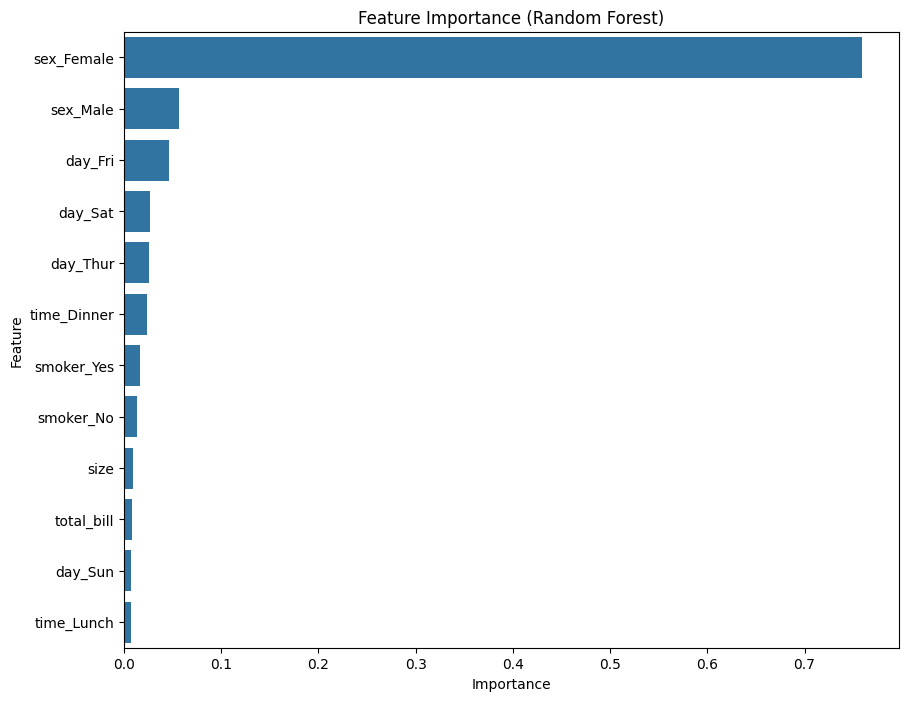

In [13]:
# Feature importance from Random Forest model
rf_model = rf_pipeline.named_steps['model']
feature_importances = rf_model.feature_importances_
feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols).tolist() + numerical_cols.tolist()

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importance (Random Forest)")
plt.show()

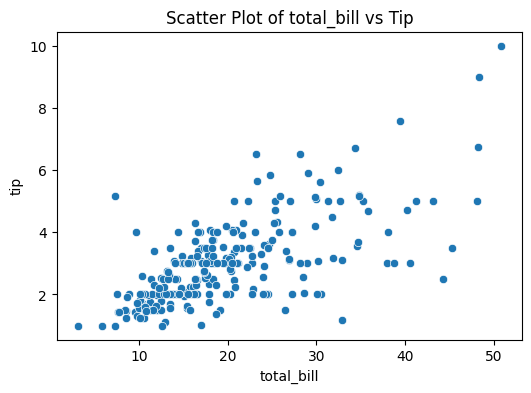

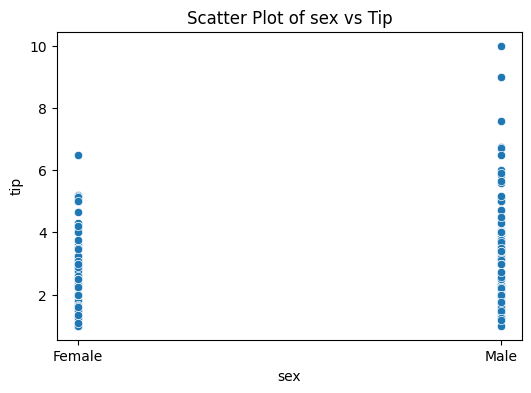

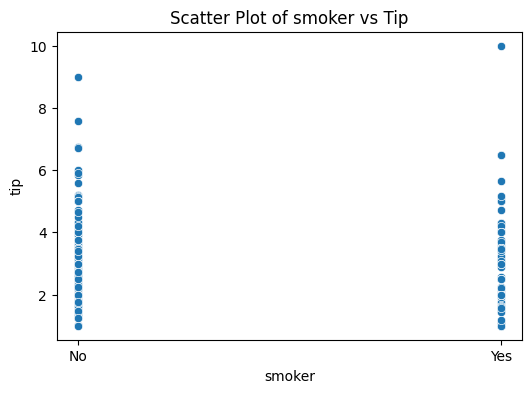

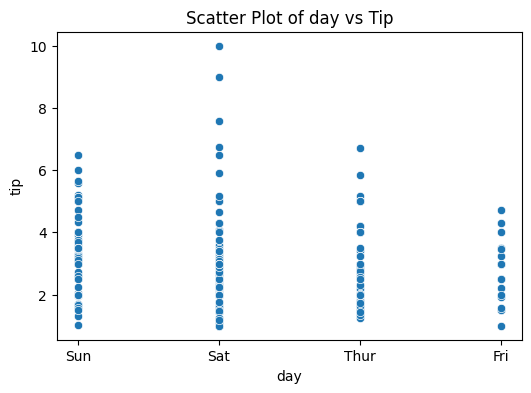

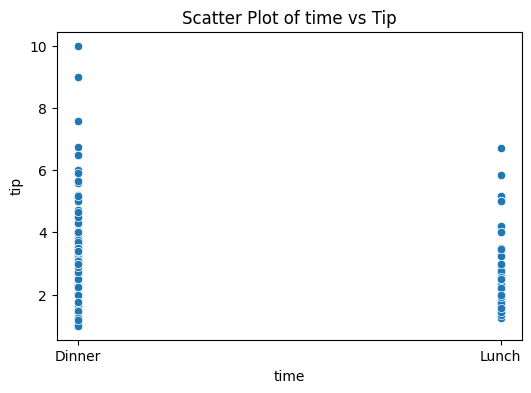

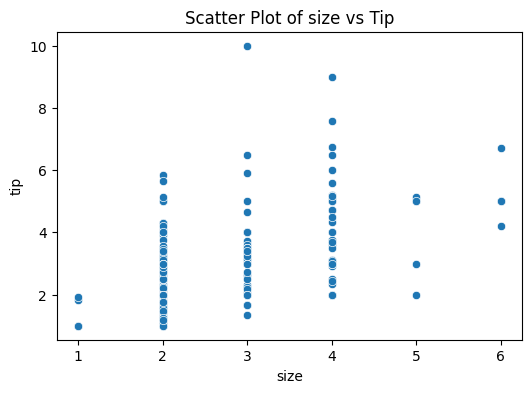

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for each feature against the target variable
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=col, y='tip')  # Replace 'tip' with the actual target column name
    plt.title(f'Scatter Plot of {col} vs Tip')
    plt.show()

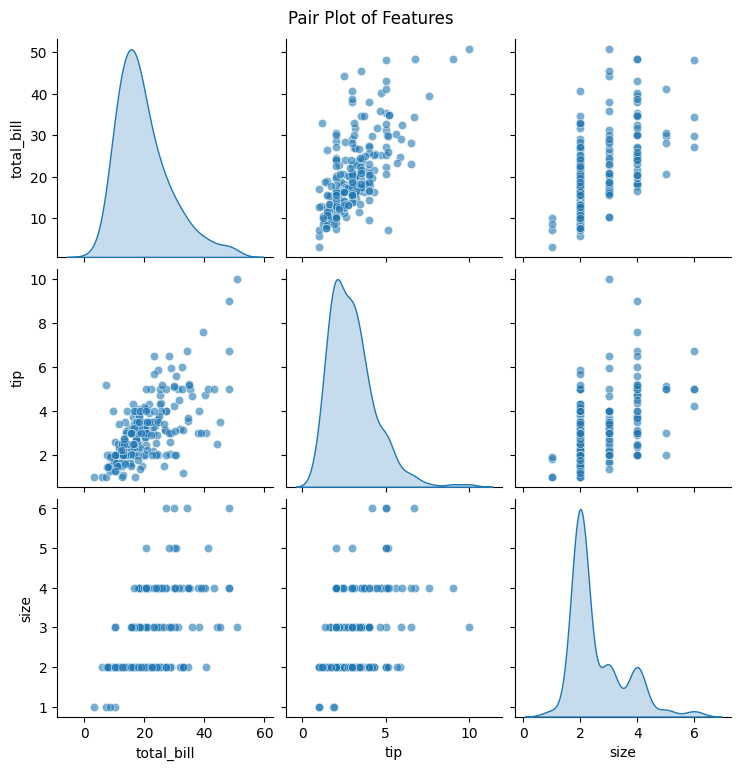

In [15]:
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

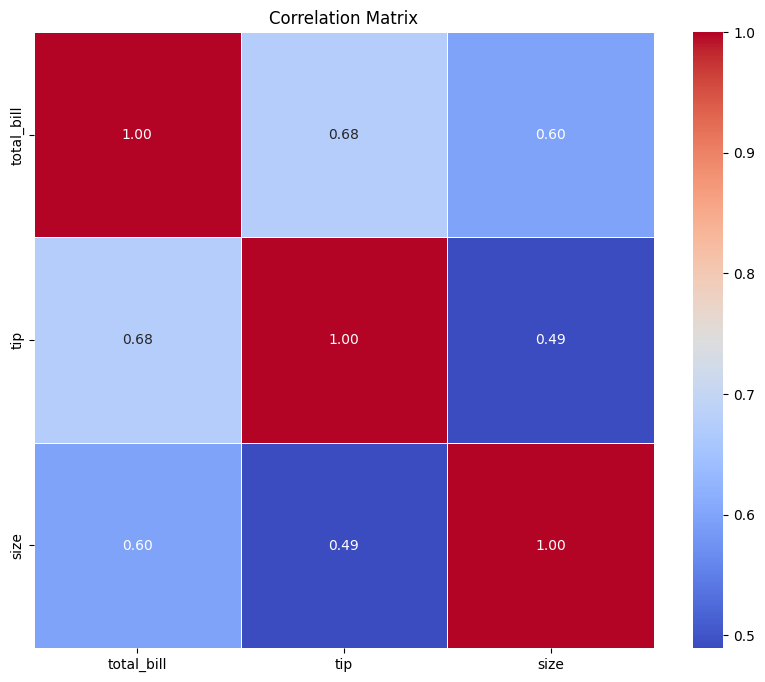

In [17]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

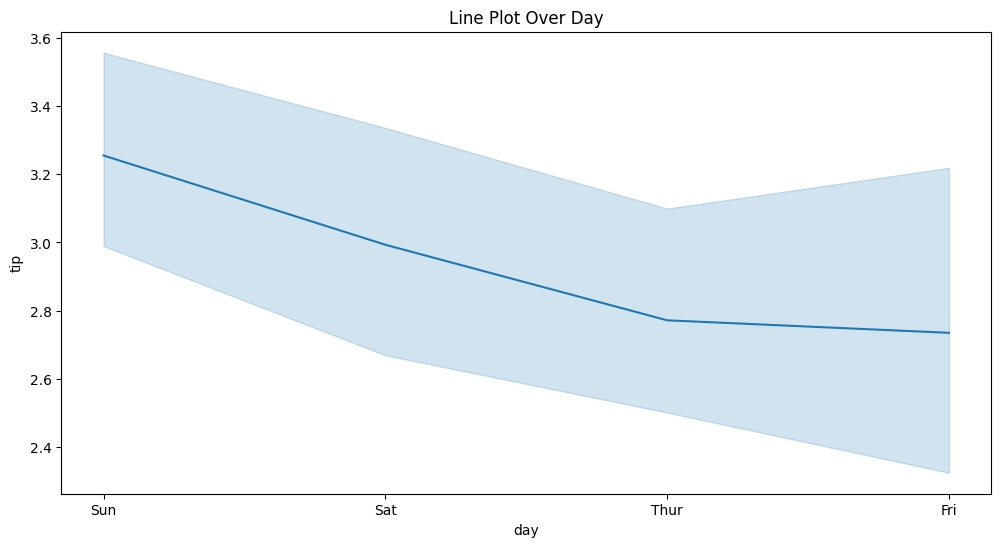

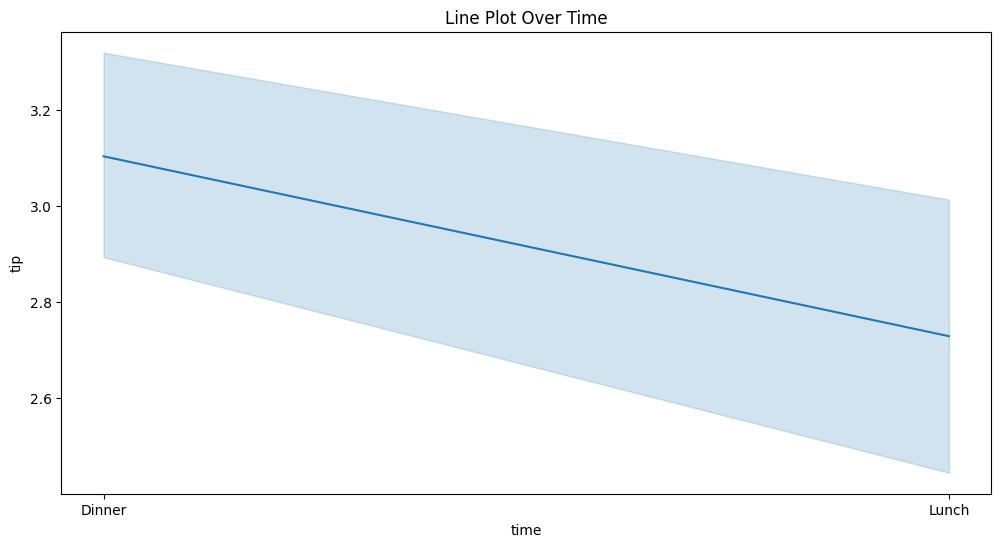

In [18]:
# If there's a time variable, replace 'time_column' with the actual name
if 'day' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x='day', y='tip')  # Replace with actual time and target columns
    plt.title("Line Plot Over Day")
    plt.show()

if 'time' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x='time', y='tip')  # Replace with actual time and target columns
    plt.title("Line Plot Over Time")
    plt.show()

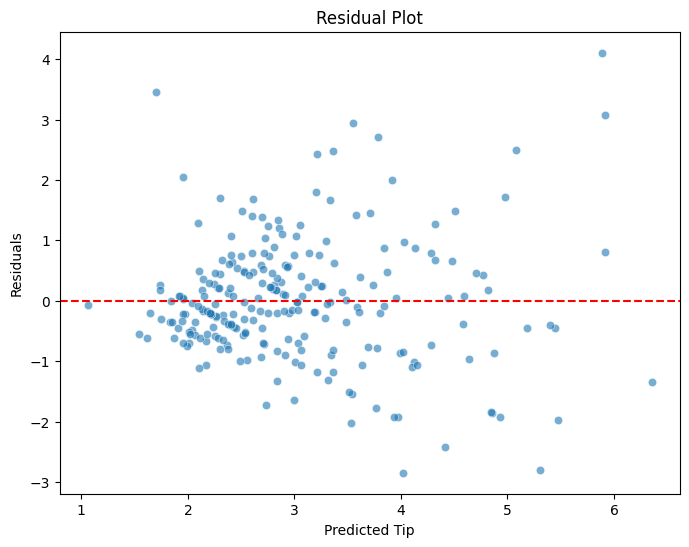

In [19]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define X (predictors) and y (target)
X = data.drop('tip', axis=1)  # Replace 'tip' with the actual target column name
y = data['tip']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), categorical_cols)
    ])

lin_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', LinearRegression())])

lin_reg_pipeline.fit(X, y)

y_pred = lin_reg_pipeline.predict(X)

residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title("Residual Plot")
plt.show()

In [20]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

X = data.drop('tip', axis=1)  
y = data['tip']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)

X_processed_with_const = sm.add_constant(X_processed)

linear_model = sm.OLS(y, X_processed_with_const).fit()

# Perform the Rainbow test
rainbow_statistic, rainbow_p_value = linear_rainbow(linear_model)

print(f'Rainbow test statistic: {rainbow_statistic}')
print(f'Rainbow test p-value: {rainbow_p_value}')

if rainbow_p_value < 0.05:
    print("The relationship is likely non-linear (reject linearity).")
else:
    print("The relationship is likely linear (fail to reject linearity).")

Rainbow test statistic: 1.1970545479945887
Rainbow test p-value: 0.16588383059241668
The relationship is likely linear (fail to reject linearity).
